# Fundamentos de Big Data.

## Autor: Victor Simo Lozano

## Actividad 5
<p>Replicar el .ipynb del manual para el Titanic Dataset y enviar resultados a Kaggle.</p>
    

<hr style="border-color:red">

<h3>SOLUCION</h3>

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br>
    <p>Replicar codigo del manual.</p>
    </div>

<p style="text-align:center"><b>--- PARTIENDO DE LA ACTIVIDAD 4 ---</b></p>

<p style="text-align:left"><b>IMPORTACIONES DE DEPENDENCIAS</b></p>

In [1]:
# Importaciones a nivel global
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importaciones algoritmos de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Importacion para evaluación de modelo
from sklearn.metrics import accuracy_score

<p style="text-align:left"><b>Tratamos de entender el problema</b></p>

In [4]:
# https://www.kaggle.com/competitions/titanic

<p style="text-align:left"><b>Obtención de datos</b></p>

In [5]:
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p style="text-align:left"><b>Borrar columna PassengerId</b></p>

In [6]:
df=df.drop('PassengerId',axis=1)

<p style="text-align:center"><b>--- CONTINUANDO LA ACTIVIDAD 5 ---</b></p>

<p style="text-align:left; font-size:20px"><b>Feature Engineering</b></p>
<p style="font-size:15px">En esta parte podemos hacer uso de la información obtenida y conclusiones.<br>Para hacerlo lo más simple posible, lo qu eharemos será elegir solamente algunas columnas.</p>

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<p style="text-align:left; font-size:15px"><b>-1- Name - no la tendremos en cuenta por simplificar</b></p>
<p style="font-size:15px">df['Name']=df['Name'].str.extract('([A-Za-z]+).',expand=False) sería una posible forma de analizar la columna Name, pero no lo haremos.</p>

<p style="text-align:left; font-size:15px"><b>-2- Age - Usamos el valor promedio para rellenar los valores faltantes</b></p>

In [9]:
df.Age.isnull().sum()

177

In [10]:
df.Age=df.Age.fillna(df.Age.mean())

In [11]:
df.Age.isnull().sum()

0

<p style="text-align:left; font-size:15px"><b>-3- Ticket - no la tendremos en cuenta</b></p>

In [12]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

<p style="text-align:left; font-size:15px"><b>-4- Cabin - no la tendremos en cuenta por falta de información</b></p>

In [13]:
df.Cabin.isnull().sum(), len(df)

(687, 891)

<p style="text-align:left; font-size:15px"><b>-5- Embarked -</b></p>

In [14]:
df.Embarked.isnull().sum()

2

In [15]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df.Embarked=df.Embarked.fillna('S')
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<p style="text-align:left; font-size:15px"><b>Borramos del Dataframe las columnas mencionadas.</b></p>

In [17]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
df=df.drop(['Name','Ticket','Cabin'], axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


<p style="text-align:left; font-size:20px"><b>Feature Engineering [2]: Datos categóricos</b></p>

In [19]:
# Una vez tenemos   nuestro Dataframe(df)

# Lo siguiente será trabajar con las columnas que tienen texto.

Concepto de ***datos categóricos***

- Columnas con strings hombre/mujer por ejemplo
- Columnas con strings con 3 opciones por ejemplo
- En el caso de Pclass 3 hace referencia a "tercera clase" y 3 no vale mas que 1 en este caso y cuya probabilidad de supervivencia es mas  baja

In [20]:
# drop_first=True porque queremos evitar multicolinearidad
# de echo en Sex si decimos que es hombre, ya no es por ende, mujer.
# entonces siendo 1 lógico  Hombre, por ejemplo, sería redundante
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked'],drop_first=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


<p style="text-align:left; font-size:20px"><b>Feature Engineering [3]: Escalado de los datos</b></p>

Existen varias formas de hacer el escalado de datos. Normalmente no hay diferencias significativas, pero algunas veces si.

Por abreviar trataremos de mencionar 2 tipos (en Sk-learn).
- StandardScaler
- MinMaxScaler

En nuestro caso no daremos importancia a cuál es el mejor en este caso concreto.
Tampoco usaremos la propia librería, sino la propia ecuación.
Existen varias formas de hacerlo, pero lo haremos de forma simple, y antes de dividir en train/test

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [22]:
# StandardScaler

# x-mean(x)/std(x)

df.Age=(df.Age-np.mean(df.Age, axis=0))/(np.std(df.Age, axis=0))
df.Fare=(df.Fare-np.mean(df.Fare, axis=0))/(np.std(df.Fare, axis=0))

df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,-0.592481,1,0,-0.502445,1,0,1,0,1
1,1,0.638789,1,0,0.786845,0,0,0,0,0
2,1,-0.284663,0,0,-0.488854,0,0,1,0,1
3,1,0.407926,1,0,0.420730,0,0,0,0,1
4,0,0.407926,0,0,-0.486337,1,0,1,0,1


<p style="text-align:left; font-size:20px"><b>Obtenemos X,y</b></p>

In [23]:
X=df.drop('Survived', axis=1)
X.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-0.592481,1,0,-0.502445,1,0,1,0,1
1,0.638789,1,0,0.786845,0,0,0,0,0
2,-0.284663,0,0,-0.488854,0,0,1,0,1
3,0.407926,1,0,0.420730,0,0,0,0,1
4,0.407926,0,0,-0.486337,1,0,1,0,1


In [24]:
y=df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
'''X=X.values
y=y.values'''

'X=X.values\ny=y.values'

<p style="text-align:left; font-size:20px"><b>Entrenamiento y prueba</b></p>

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
X_train.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
331,1.215947,0,0,-0.074583,1,0,0,0,1
733,-0.515526,0,0,-0.386671,1,1,0,0,1
382,0.177063,0,0,-0.488854,1,0,1,0,1
704,-0.284663,1,0,-0.490280,1,0,1,0,1
813,-1.823750,4,2,-0.018709,0,0,1,0,1


In [28]:
X_test.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
709,0.000000,1,1,-0.341452,1,0,1,0,0
439,0.100109,0,0,-0.437007,1,1,0,0,1
840,-0.746389,0,0,-0.488854,1,0,1,0,1
720,-1.823750,0,1,0.016023,0,1,0,0,1
39,-1.208115,1,0,-0.422074,0,0,1,0,0


In [29]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [30]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

<p style="text-align:left; font-size:20px"><b>Prueba posibles algoritmos</b></p>

In [31]:
# KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
acc_KN=accuracy_score(y_test, y_pred)
acc_KN

0.8212290502793296

In [32]:
# DecisionTreeClassifier
clf_2=DecisionTreeClassifier()
clf_2.fit(X_train, y_train)
y_pred_2=clf_2.predict(X_test)
acc_DT=accuracy_score(y_test, y_pred_2)
acc_DT

0.7653631284916201

In [33]:
# RandomForestClassifier
clf_3=RandomForestClassifier()
clf_3.fit(X_train, y_train)
y_pred_3=clf_3.predict(X_test)
acc_RF=accuracy_score(y_test,y_pred_3)
acc_RF

0.8044692737430168

In [34]:
# GaussianNB
clf_4=GaussianNB()
clf_4.fit(X_train, y_train)
y_pred_4=clf_4.predict(X_test)
acc_NB=accuracy_score(y_test,y_pred_4)
acc_NB

0.7653631284916201

In [35]:
# SVC
clf_5=SVC()
clf_5.fit(X_train, y_train)
y_pred_5=clf_5.predict(X_test)
acc_SVC=accuracy_score(y_test,y_pred_5)
acc_SVC

0.8156424581005587

<p style="text-align:left; font-size:20px"><b>Busco el que mejor predice</b></p>

In [36]:
# A priori, y sin ver más parámetros...

# KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
acc_KN=accuracy_score(y_test, y_pred)
acc_KN

0.8212290502793296

<p style="text-align:left; font-size:20px"><b>Utilizo ese entrenamiento para test.csv</b></p>

Para evitar complejidad, y una posible explicación sobre ***presistencia del modelo.***

https://scikit-learn.org/stable/modules/model_persistence.html

lo que haremos será hacer esos mismos cambios en test.csv

In [37]:
test=pd.read_csv('titanic/test.csv')
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [38]:
df_original=pd.read_csv('titanic/train.csv')
df_original.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<p style="text-align:left; font-size:20px"><b>Ahora NO TENEMOS la información de "Survived". TENDREMOS, PUES QUE PREDECIRLA</b></p>

Pasos:
- -1-  Haremos a cada columna exactamente los mismos cambios en "test" que en "df"
- -2- Haremos la predicción (ahora no sabemos de momento como de buena o mala fue)
- -3- Nos iremos a Kaggle para enviar resultados

In [39]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [40]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
test.Age=test.Age.fillna(test.Age.mean())
test.Fare=test.Fare.fillna(test.Fare.mean())

In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [43]:
test=test.drop(['Name','Ticket','Cabin'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [44]:
# df.Age=(df.Age-np.mean(df.Age, axis=0))/(np.std(df.Age, axis=0))
# df.Fare=(df.Fare-np.mean(df.Fare, axis=0))/(np.std(df.Fare, axis=0))

test.Age=(test.Age-np.mean(test.Age, axis=0))/(np.std(test.Age, axis=0))
test.Fare=(test.Fare-np.mean(test.Fare, axis=0))/(np.std(test.Fare, axis=0))

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,0.334993,0,0,-0.498407,Q
1,893,3,female,1.325530,1,0,-0.513274,S
2,894,2,male,2.514175,0,0,-0.465088,Q
3,895,3,male,-0.259330,0,0,-0.483466,S
4,896,3,female,-0.655545,1,1,-0.418471,S


In [45]:
# df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked'],drop_first=True)

test=pd.get_dummies(test,columns=['Sex','Pclass','Embarked'],drop_first=True)
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,0.334993,0,0,-0.498407,1,0,1,1,0
1,893,1.325530,1,0,-0.513274,0,0,1,0,1
2,894,2.514175,0,0,-0.465088,1,1,0,1,0
3,895,-0.259330,0,0,-0.483466,1,0,1,0,1
4,896,-0.655545,1,1,-0.418471,0,0,1,0,1


In [46]:
test=test.drop('PassengerId', axis=1)
test.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.334993,0,0,-0.498407,1,0,1,1,0
1,1.325530,1,0,-0.513274,0,0,1,0,1
2,2.514175,0,0,-0.465088,1,1,0,1,0
3,-0.259330,0,0,-0.483466,1,0,1,0,1
4,-0.655545,1,1,-0.418471,0,0,1,0,1


In [47]:
# KNeighborsClassifier - el "mejor" bajos estas premisas
# y en este caso para "test"
clf=KNeighborsClassifier()
# entreno con los datos que tenia del primer dataset
clf.fit(X_train, y_train)
# ahora hago la predicción sobre "test"
y_predecida=clf.predict(test)
y_predecida

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<p style="text-align:left; font-size:20px"><b>Me creo un dataframe con la información Submission.csv</b></p>

In [48]:
df_submission=pd.read_csv('titanic/gender_submission.csv')
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<p style="text-align:left; font-size:20px"><b>Ahora le pego la información de MI PREDICCION</b></p>

In [49]:
df_submission['Survived']=y_predecida
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [50]:
df_submission.to_csv('titanic/titanic_submit.csv', index=False)

<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br>
    <p>Enviar predicción a Kaggle.</p>
    </div>

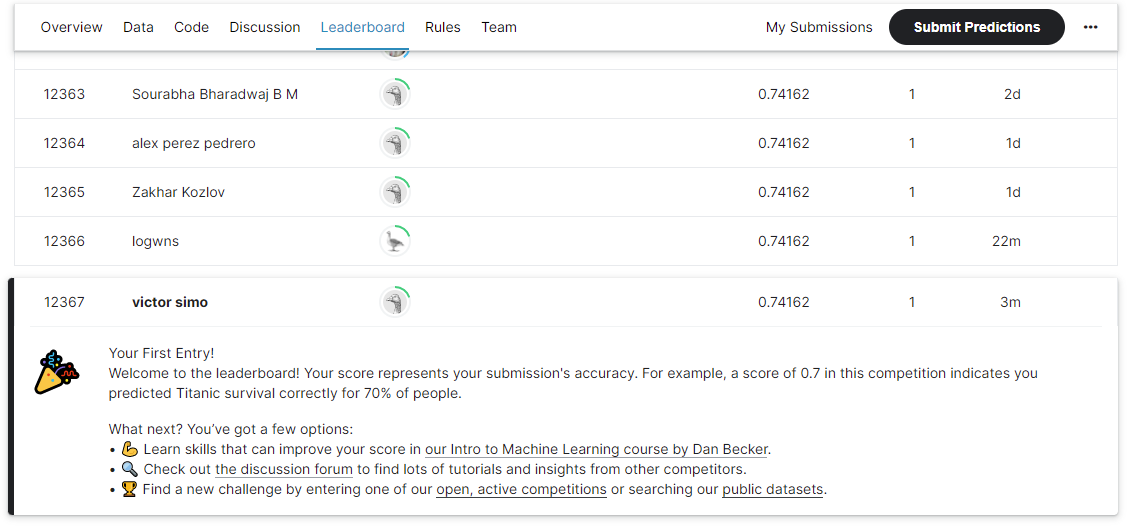